In [1]:
import torch
import torch.nn as nn
import os
import cv2
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [2]:
from torchvision import models
from torchvision import transforms
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [3]:
if(os.path.split(os.getcwd())[1] == "Transfer_Learning"):
    os.chdir("..")
print("Current Working Directory: {}".format(os.path.split(os.getcwd())[1]))

cuda = True

Current Working Directory: progettoVIPM


In [4]:
from utils.loadersAndEnums import datasets
from utils.loadersAndEnums import networks
from utils.loadersAndEnums import ImageDataset

In [5]:
model = models.resnet50()
num_classes = 101
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load("C:\\Users\\marco\\Desktop\\Uni\\Magistrale\\VIPM\\Progetto\\resnet50model.pth")['model_state'])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cuda


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
num_classes = 251
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [7]:
from torch.utils.data import DataLoader, ConcatDataset, random_split


trainL = ImageDataset(datasets.TRAINING_LABELED_80, 224, cuda=True)
trainU = ImageDataset(datasets.ASSIGNED_LABELS_10,224,cuda=True)
trainC = ConcatDataset([trainL,trainU])
val = ImageDataset(datasets.VALIDATION_LABELED_20, 224, cuda=True)
test = ImageDataset(datasets.TEST, 224, cuda=True)

trainL = DataLoader(trainL, batch_size=128, shuffle=True)
trainC = DataLoader(trainC, batch_size=128, shuffle=True)
valL = DataLoader(val, batch_size=128, shuffle=False)
test = DataLoader(test, batch_size=128, shuffle=False)


In [9]:
torch.cuda.empty_cache()
batch = next(iter(trainDL))
print(batch)

[tensor([[[[ 8.8068e-01,  8.7828e-01,  8.7597e-01,  ...,  8.6275e-01,
            8.6275e-01,  8.6275e-01],
          [ 8.7403e-01,  8.7173e-01,  8.6934e-01,  ...,  8.6211e-01,
            8.6280e-01,  8.6275e-01],
          [ 8.7405e-01,  8.7156e-01,  8.6933e-01,  ...,  8.6012e-01,
            8.6246e-01,  8.6275e-01],
          ...,
          [ 8.1575e-01,  8.1055e-01,  8.0680e-01,  ...,  7.6588e-01,
            7.7134e-01,  7.8273e-01],
          [ 8.2323e-01,  8.2116e-01,  8.1909e-01,  ...,  8.0416e-01,
            8.0609e-01,  8.1300e-01],
          [ 8.3163e-01,  8.2929e-01,  8.2718e-01,  ...,  8.4629e-01,
            8.4789e-01,  8.5082e-01]],

         [[ 8.8068e-01,  8.7828e-01,  8.7597e-01,  ...,  8.5882e-01,
            8.5882e-01,  8.5882e-01],
          [ 8.7403e-01,  8.7173e-01,  8.6934e-01,  ...,  8.5819e-01,
            8.5887e-01,  8.5882e-01],
          [ 8.7405e-01,  8.7156e-01,  8.6933e-01,  ...,  8.5620e-01,
            8.5854e-01,  8.5883e-01],
          ...,
    

In [12]:
train_loss = []
val_loss = []
train_acc = []
val_acc = []
num_epochs = 10
best_val_loss = float('inf')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
best_model_path = 'Transfer_Learning/models/best_FineTuned_ResNet50.pth'
for epoch in range(num_epochs):
    print(f'Epoch: {epoch+1}')
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    i = 0
    print("Training:")
    for inputs, labels in trainL:
        i=i+1
        if i%10 == 0:
            print(f'Batch {i} di {len(trainL)}')
        labels = [int(label) for label in labels]
        
        
        inputs = inputs.to(device) 
        labels = torch.tensor(labels, dtype=torch.long).to(device)
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Training Loss: {running_loss/len(trainL)}, Accuracy: {100*correct/total}%')
    train_acc.append(100*correct/total)
    train_loss.append(running_loss/len(trainL))
    print('Validation:')
    model.eval()
    running_loss = 0.0
    i = 0
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs,labels in valL:
            i+=1
            if i%10 == 0:
                print(f'Batch {i} di {len(valL)}')            
            labels=[int(lable) for lable in labels]
            
            inputs,labels = inputs.to(device), torch.tensor(labels,dtype=torch.long).to(device)
            outputs = model(inputs)
            _,predicted = torch.max(outputs,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs,labels)
            running_loss += loss.item()
    val_loss_epoch = running_loss / len(valL)
    print(f'Validation Loss: {val_loss_epoch}, Accuracy: {100*correct/total}%')
    val_loss.append(running_loss/len(valL))
    val_acc.append(100*correct/total)
    if val_loss_epoch < best_val_loss:
        best_val_loss = val_loss_epoch
        torch.save(model.state_dict(), best_model_path)
        print(f'Best model saved with validation loss: {best_val_loss}')

Epoch: 1
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 5.469092294573784, Accuracy: 2.2161354581673307%
Validation:
Validation Loss: 5.200386643409729, Accuracy: 9.860557768924302%
Best model saved with validation loss: 5.200386643409729
Epoch: 2
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 4.759965047240257, Accuracy: 26.469123505976096%
Validation:
Validation Loss: 4.635270953178406, Accuracy: 20.219123505976096%
Best model saved with validation loss: 4.635270953178406
Epoch: 3
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 3.93840354681015, Accuracy: 42.52988047808765%
Validation:
Validation Loss: 4.160958886146545, Accuracy: 25.697211155378486%
Best model saved with validation loss: 4.160958886146545
Epoch: 4
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 3.183687776327133, Accuracy: 52.963147410358566%
Validation:
Validation Loss: 3.820275455713272, Accuracy: 29.58167330677291%
Best mode

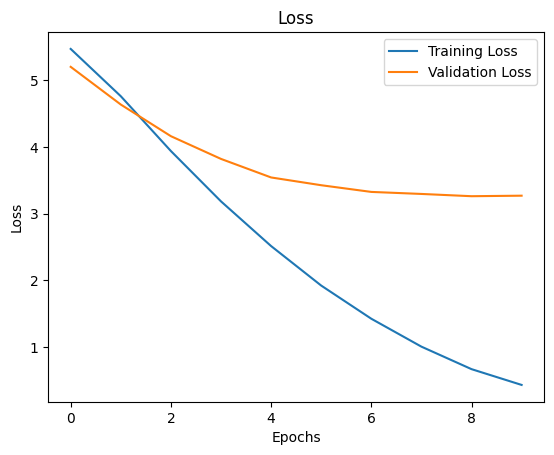

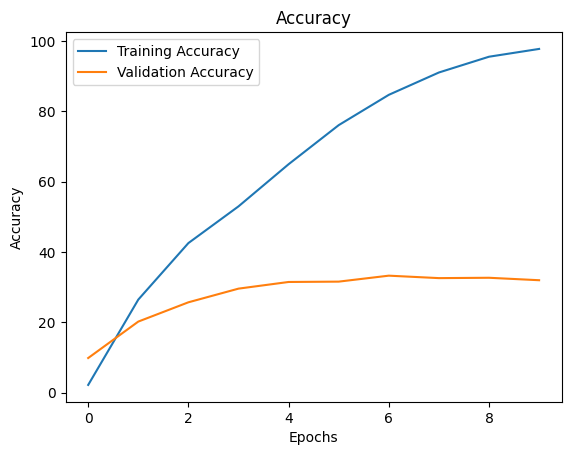

In [13]:
def plot_loss(train_loss,val_loss):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Loss')
    ax.plot(train_loss, label='Training Loss')
    ax.plot(val_loss, label='Validation Loss')
    ax.legend()

    plt.show()
    
def plot_accuracy(train_acc,val_acc):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy')
    ax.plot(train_acc, label='Training Accuracy')
    ax.plot(val_acc, label='Validation Accuracy')
    ax.legend()

    plt.show()
    
plot_loss(train_loss,val_loss)
plot_accuracy(train_acc,val_acc)

In [11]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testDL:
        labels = [int(label) for label in labels]
        inputs, labels = inputs.to(device), torch.tensor(labels, dtype=torch.long).to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')

Accuracy: 40.8370852092713%


In [13]:
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs,labels in testDL:
        labels = [int(label) for label in labels]
        inputs, labels = inputs.to(device), torch.tensor(labels, dtype=torch.long).to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
        
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
cm = confusion_matrix(all_labels, all_preds)

np.save('./Transfer_Learning/model_metrics/cmResNet50PreTrained10Epochs.npy',cm)
torch.save(model, "finetunedResNet50.pth")


In [8]:
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
num_classes = 251
model.fc = nn.Linear(model.fc.in_features, num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cuda


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
train_loss = []
val_loss = []
train_acc = []
val_acc = []
num_epochs = 10
best_val_loss = float('inf')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
best_model_path = 'Transfer_Learning/models/best_FineTuned_ResNet50_NO_FREEZE.pth'
for epoch in range(num_epochs):
    print(f'Epoch: {epoch+1}')
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    i = 0
    print("Training:")
    for inputs, labels in trainL:
        i=i+1
        if i%10 == 0:
            print(f'Batch {i} di {len(trainL)}')
        labels = [int(label) for label in labels]
        
        
        inputs = inputs.to(device) 
        labels = torch.tensor(labels, dtype=torch.long).to(device)
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Training Loss: {running_loss/len(trainL)}, Accuracy: {100*correct/total}%')
    train_acc.append(100*correct/total)
    train_loss.append(running_loss/len(trainL))
    print('Validation:')
    model.eval()
    running_loss = 0.0
    i = 0
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs,labels in valL:
            i+=1
            if i%10 == 0:
                print(f'Batch {i} di {len(valL)}')            
            labels=[int(lable) for lable in labels]
            
            inputs,labels = inputs.to(device), torch.tensor(labels,dtype=torch.long).to(device)
            outputs = model(inputs)
            _,predicted = torch.max(outputs,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs,labels)
            running_loss += loss.item()
    val_loss_epoch = running_loss / len(valL)
    print(f'Validation Loss: {val_loss_epoch}, Accuracy: {100*correct/total}%')
    val_loss.append(running_loss/len(valL))
    val_acc.append(100*correct/total)
    if val_loss_epoch < best_val_loss:
        best_val_loss = val_loss_epoch
        torch.save(model.state_dict(), best_model_path)
        print(f'Best model saved with validation loss: {best_val_loss}')

Epoch: 1
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 5.5136539041996, Accuracy: 0.49800796812749004%
Validation:
Validation Loss: 5.448182702064514, Accuracy: 2.589641434262948%
Best model saved with validation loss: 5.448182702064514
Epoch: 2
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 5.026100158691406, Accuracy: 25.074701195219124%
Validation:
Validation Loss: 5.050008535385132, Accuracy: 7.868525896414343%
Best model saved with validation loss: 5.050008535385132
Epoch: 3
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 4.14134769141674, Accuracy: 54.905378486055774%
Validation:
Validation Loss: 4.521238386631012, Accuracy: 14.342629482071713%
Best model saved with validation loss: 4.521238386631012
Epoch: 4
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 3.1016466319561005, Accuracy: 70.86653386454184%
Validation:
Validation Loss: 4.050045549869537, Accuracy: 21.314741035856574%
Best mode

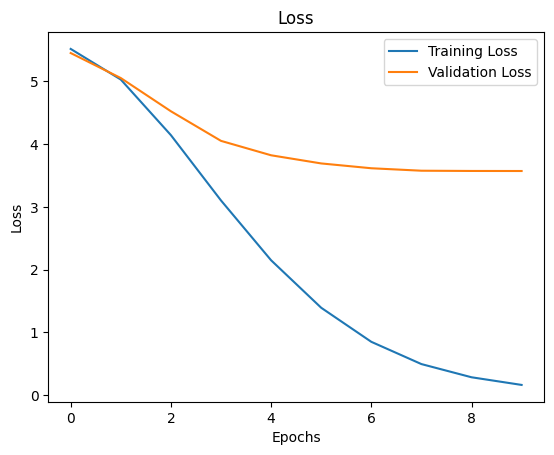

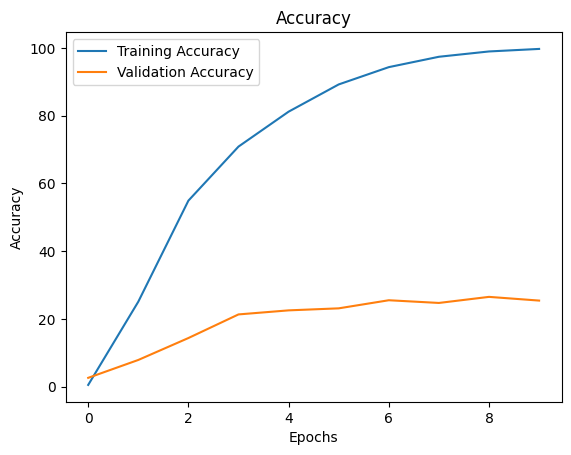

In [10]:
def plot_loss(train_loss,val_loss):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Loss')
    ax.plot(train_loss, label='Training Loss')
    ax.plot(val_loss, label='Validation Loss')
    ax.legend()

    plt.show()
    
def plot_accuracy(train_acc,val_acc):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy')
    ax.plot(train_acc, label='Training Accuracy')
    ax.plot(val_acc, label='Validation Accuracy')
    ax.legend()

    plt.show()
    
plot_loss(train_loss,val_loss)
plot_accuracy(train_acc,val_acc)

## Data Augmentation for Degraded Dataset

In [5]:
from torch.utils.data import DataLoader, ConcatDataset, random_split


trainL = ImageDataset(datasets.TRAINING_LABELED_80, 224, cuda=True)
val = ImageDataset(datasets.VALIDATION_LABELED_20, 224, cuda=True)
valD = ImageDataset(datasets.VALIDATION_20_DEGRADED, 224, cuda=True)

trainL = DataLoader(trainL, batch_size=128, shuffle=True)
val = DataLoader(val, batch_size=128, shuffle=True)
valD = DataLoader(valD, batch_size=128, shuffle=True)


In [14]:
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
num_classes = 251
model.fc = nn.Linear(model.fc.in_features, num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cuda


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
from utils.augmentations import validation_augment

train_loss = []
val_loss = []
val_deg_loss = []
train_acc = []
val_acc = []
val_deg_acc = []
num_epochs = 50
best_val_loss = float('inf')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-5)
best_model_path = 'Transfer_Learning/models/best_FineTuned_ResNet50_NO_FREEZE_DEGRADED_DATA_LOW_LR.pth'
for epoch in range(num_epochs):
    print(f'Epoch: {epoch+1}')
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    i = 0
    print("Training:")
    for inputs, labels in trainL:
        i=i+1
        if i%10 == 0:
            print(f'Batch {i} di {len(trainL)}')
        labels = [int(label) for label in labels]
        
        inputs = validation_augment(inputs.cpu())
        inputs = inputs.to(device) 
        labels = torch.tensor(labels, dtype=torch.long).to(device)
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Training Loss: {running_loss/len(trainL)}, Accuracy: {100*correct/total}%')
    train_acc.append(100*correct/total)
    train_loss.append(running_loss/len(trainL))
    print('Validation:')
    model.eval()
    running_loss = 0.0
    i = 0
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs,labels in val:
            i+=1
            if i%10 == 0:
                print(f'Batch {i} di {len(val)}')            
            labels=[int(lable) for lable in labels]
            
            inputs,labels = inputs.to(device), torch.tensor(labels,dtype=torch.long).to(device)
            outputs = model(inputs)
            _,predicted = torch.max(outputs,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs,labels)
            running_loss += loss.item()
    val_loss_epoch = running_loss / len(val)
    print(f'Validation Loss: {val_loss_epoch}, Accuracy: {100*correct/total}%')
    val_loss.append(running_loss/len(val))
    val_acc.append(100*correct/total)
    print("Validation Degraded:")
    model.eval()
    running_loss = 0.0
    i = 0
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs,labels in valD:
            i+=1
            if i%10 == 0:
                print(f'Batch {i} di {len(valD)}')            
            labels=[int(lable) for lable in labels]
            
            inputs,labels = inputs.to(device), torch.tensor(labels,dtype=torch.long).to(device)
            outputs = model(inputs)
            _,predicted = torch.max(outputs,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs,labels)
            running_loss += loss.item()
    val_loss_epoch = running_loss / len(valD)
    print(f'Validation Loss: {val_loss_epoch}, Accuracy: {100*correct/total}%')
    val_deg_loss.append(running_loss/len(valD))
    val_deg_acc.append(100*correct/total)
        
    if val_loss_epoch < best_val_loss:
        best_val_loss = val_loss_epoch
        torch.save(model.state_dict(), best_model_path)
        print(f'Best model saved with degraded validation loss: {best_val_loss} and accuracy: {100*correct/total}')

Epoch: 1
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 5.535291522741318, Accuracy: 0.3237051792828685%
Validation:
Validation Loss: 5.533124685287476, Accuracy: 0.5976095617529881%
Validation Degraded:
Validation Loss: 5.531211018562317, Accuracy: 0.49800796812749004%
Best model saved with degraded validation loss: 5.531211018562317 and accuracy: 0.49800796812749004
Epoch: 2
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 5.525281697511673, Accuracy: 0.398406374501992%
Validation:
Validation Loss: 5.621905446052551, Accuracy: 0.29880478087649404%
Validation Degraded:
Validation Loss: 5.581721365451813, Accuracy: 0.49800796812749004%
Epoch: 3
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 5.515319541096687, Accuracy: 0.6723107569721115%
Validation:
Validation Loss: 5.606873631477356, Accuracy: 0.29880478087649404%
Validation Degraded:
Validation Loss: 5.574459195137024, Accuracy: 0.796812749003984%
Epoch: 4
Training:


KeyboardInterrupt: 

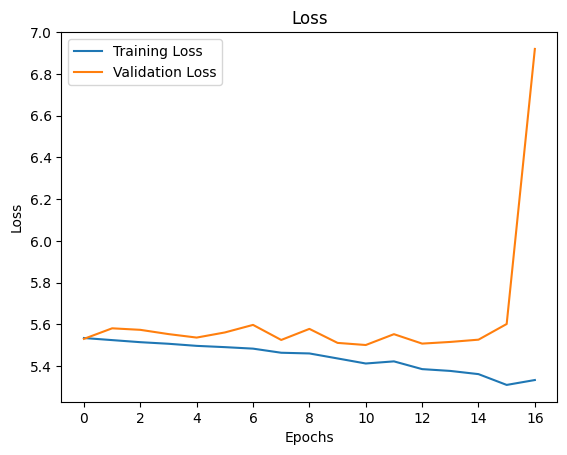

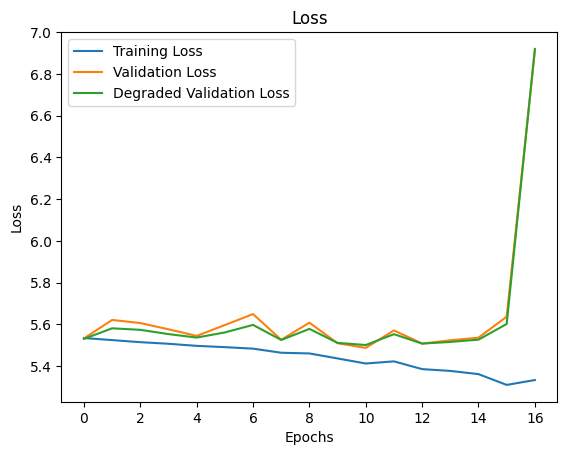

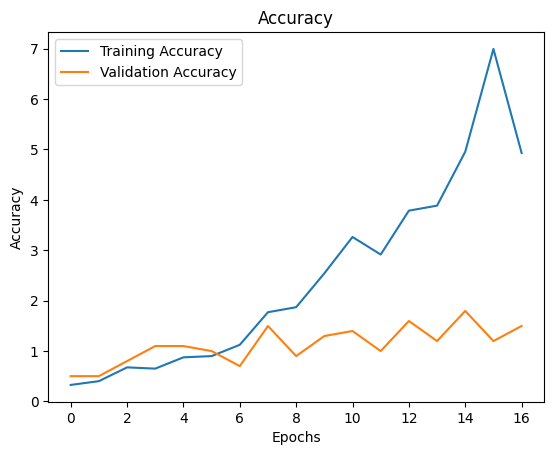

In [16]:
def plot_loss(train_loss,val_loss):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Loss')
    ax.plot(train_loss, label='Training Loss')
    ax.plot(val_loss, label='Validation Loss')
    ax.legend()

    plt.show()
    
def plot_accuracy(train_acc,val_acc):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy')
    ax.plot(train_acc, label='Training Accuracy')
    ax.plot(val_acc, label='Validation Accuracy')
    ax.legend()

    plt.show()
    
def plot_all_losses(train_loss,val_loss,val_deg_loss):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Loss')
    ax.plot(train_loss, label='Training Loss')
    ax.plot(val_loss, label='Validation Loss')
    ax.plot(val_deg_loss, label='Degraded Validation Loss')
    ax.legend()

    plt.show()
    
plot_loss(train_loss,val_deg_loss)
plot_all_losses(train_loss,val_loss,val_deg_loss)
plot_accuracy(train_acc,val_deg_acc)

In [17]:
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
num_classes = 251
model.fc = nn.Linear(model.fc.in_features, num_classes)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cuda


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
from utils.augmentations import validation_augment

train_loss = []
val_loss = []
val_deg_loss = []
train_acc = []
val_acc = []
val_deg_acc = []
num_epochs = 50
best_val_loss = float('inf')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 5e-5)
best_model_path = 'Transfer_Learning/models/best_FineTuned_ResNet50_NO_FREEZE_DEGRADED_DATA_HALF_LR.pth'
for epoch in range(num_epochs):
    print(f'Epoch: {epoch+1}')
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    i = 0
    print("Training:")
    for inputs, labels in trainL:
        i=i+1
        if i%10 == 0:
            print(f'Batch {i} di {len(trainL)}')
        labels = [int(label) for label in labels]
        
        inputs = validation_augment(inputs.cpu())
        inputs = inputs.to(device) 
        labels = torch.tensor(labels, dtype=torch.long).to(device)
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Training Loss: {running_loss/len(trainL)}, Accuracy: {100*correct/total}%')
    train_acc.append(100*correct/total)
    train_loss.append(running_loss/len(trainL))
    print('Validation:')
    model.eval()
    running_loss = 0.0
    i = 0
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs,labels in val:
            i+=1
            if i%10 == 0:
                print(f'Batch {i} di {len(val)}')            
            labels=[int(lable) for lable in labels]
            
            inputs,labels = inputs.to(device), torch.tensor(labels,dtype=torch.long).to(device)
            outputs = model(inputs)
            _,predicted = torch.max(outputs,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs,labels)
            running_loss += loss.item()
    val_loss_epoch = running_loss / len(val)
    print(f'Validation Loss: {val_loss_epoch}, Accuracy: {100*correct/total}%')
    val_loss.append(running_loss/len(val))
    val_acc.append(100*correct/total)
    print("Validation Degraded:")
    model.eval()
    running_loss = 0.0
    i = 0
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs,labels in valD:
            i+=1
            if i%10 == 0:
                print(f'Batch {i} di {len(valD)}')            
            labels=[int(lable) for lable in labels]
            
            inputs,labels = inputs.to(device), torch.tensor(labels,dtype=torch.long).to(device)
            outputs = model(inputs)
            _,predicted = torch.max(outputs,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs,labels)
            running_loss += loss.item()
    val_loss_epoch = running_loss / len(valD)
    print(f'Validation Loss: {val_loss_epoch}, Accuracy: {100*correct/total}%')
    val_deg_loss.append(running_loss/len(valD))
    val_deg_acc.append(100*correct/total)
        
    if val_loss_epoch < best_val_loss:
        best_val_loss = val_loss_epoch
        torch.save(model.state_dict(), best_model_path)
        print(f'Best model saved with degraded validation loss: {best_val_loss} and accuracy: {100*correct/total}')

Epoch: 1
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 5.532148599624634, Accuracy: 0.398406374501992%
Validation:
Validation Loss: 5.5228769183158875, Accuracy: 0.49800796812749004%
Validation Degraded:
Validation Loss: 5.518443703651428, Accuracy: 0.29880478087649404%
Best model saved with degraded validation loss: 5.518443703651428 and accuracy: 0.29880478087649404
Epoch: 2
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 5.482283771038055, Accuracy: 1.4442231075697212%
Validation:
Validation Loss: 5.4954041838645935, Accuracy: 0.6972111553784861%
Validation Degraded:
Validation Loss: 5.502286612987518, Accuracy: 0.796812749003984%
Best model saved with degraded validation loss: 5.502286612987518 and accuracy: 0.796812749003984
Epoch: 3
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 5.442100867629051, Accuracy: 2.664342629482072%
Validation:
Validation Loss: 5.773029565811157, Accuracy: 0.896414342629482%
Validation

In [5]:
train_loss = [5.532148599624634, 5.482283771038055, 5.442100867629051, 5.350327968597412, 5.172126263380051, 4.950405597686768, 4.75192603468895, 4.41798423230648, 4.056694984436035, 3.7926212400197983, 3.508497156202793, 3.2363577261567116, 2.946307510137558, 2.8082404658198357, 2.590374682098627, 2.403303813189268, 2.026084743440151]
val_loss = [5.5228769183158875, 5.4954041838645935, 5.773029565811157, 5.488868296146393, 5.400173366069794, 5.362191736698151, 12.36219596862793, 6.908022999763489, 5.44372421503067, 4.498734891414642, 4.25822451710701, 4.636133253574371, 4.018117904663086, 4.565929591655731, 4.9926950335502625, 4.594448268413544, 3.6877055168151855]
val_deg_loss = [5.518443703651428, 5.502286612987518, 5.6597142815589905, 5.4738030433654785, 5.3890785574913025, 5.300668716430664, 11.042152643203735, 6.358993947505951, 5.266889214515686, 4.643080115318298, 4.48699814081192, 4.648286163806915, 4.3792983293533325, 4.539540886878967, 4.811923027038574, 4.677089750766754, 4.188602566719055]
train_acc = [0.398406374501992, 1.4442231075697212, 2.664342629482072, 5.02988047808765, 8.939243027888446, 11.977091633466136, 11.827689243027889, 17.953187250996017, 26.045816733067728, 28.560756972111555, 33.8894422310757, 38.072709163346616, 43.42629482071713, 44.44721115537848, 49.85059760956175, 53.75996015936255, 63.02290836653386]
val_acc = [0.49800796812749004, 0.6972111553784861, 0.896414342629482, 1.593625498007968, 2.49003984063745, 3.585657370517928, 0.398406374501992, 2.49003984063745, 5.179282868525896, 11.653386454183266, 14.442231075697212, 11.852589641434262, 16.633466135458168, 11.752988047808765, 8.96414342629482, 11.852589641434262, 22.808764940239044]
val_deg_acc = [0.29880478087649404, 0.796812749003984, 0.5976095617529881, 1.4940239043824701, 1.9920318725099602, 3.187250996015936, 2.3904382470119523, 4.083665338645418, 5.776892430278885, 8.96414342629482, 10.657370517928287, 10.358565737051793, 12.549800796812749, 10.557768924302788, 9.860557768924302, 10.0597609561753, 16.235059760956176]

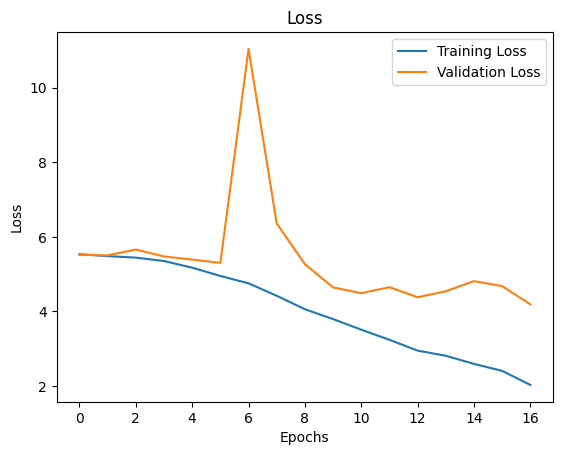

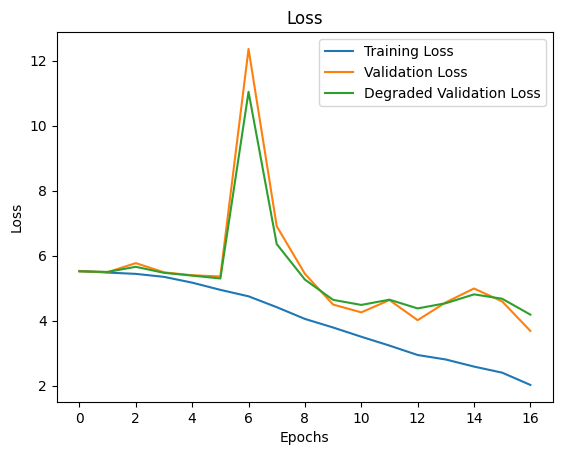

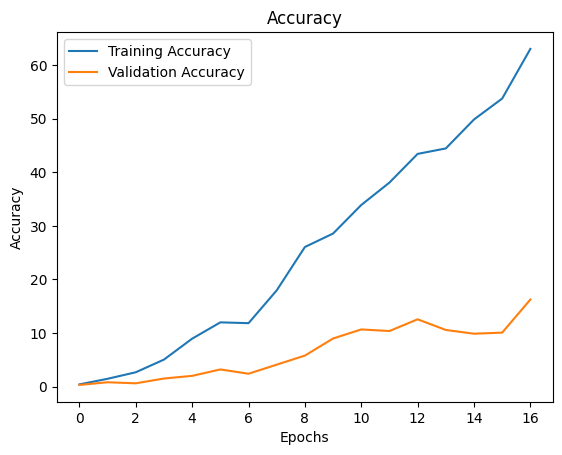

In [6]:
def plot_loss(train_loss,val_loss):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Loss')
    ax.plot(train_loss, label='Training Loss')
    ax.plot(val_loss, label='Validation Loss')
    ax.legend()

    plt.show()
    
def plot_accuracy(train_acc,val_acc):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy')
    ax.plot(train_acc, label='Training Accuracy')
    ax.plot(val_acc, label='Validation Accuracy')
    ax.legend()

    plt.show()
    
def plot_all_losses(train_loss,val_loss,val_deg_loss):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Loss')
    ax.plot(train_loss, label='Training Loss')
    ax.plot(val_loss, label='Validation Loss')
    ax.plot(val_deg_loss, label='Degraded Validation Loss')
    ax.legend()

    plt.show()
    
plot_loss(train_loss,val_deg_loss)
plot_all_losses(train_loss,val_loss,val_deg_loss)
plot_accuracy(train_acc,val_deg_acc)

NOTE: THIS PLOT REFERS TO THE FULL TRAINING WITH 1e-4 LR!

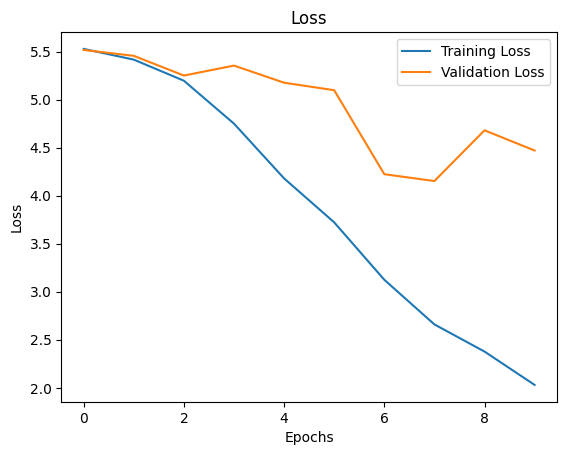

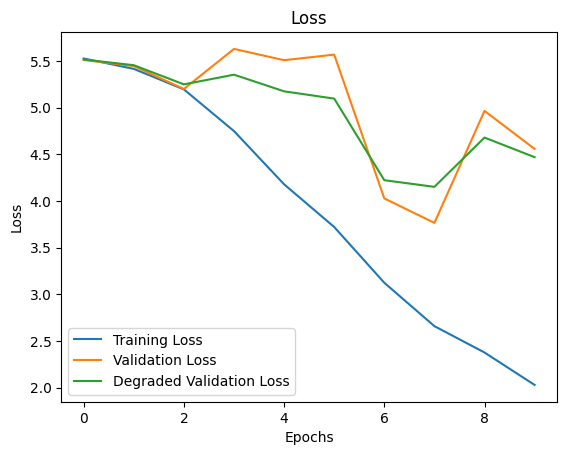

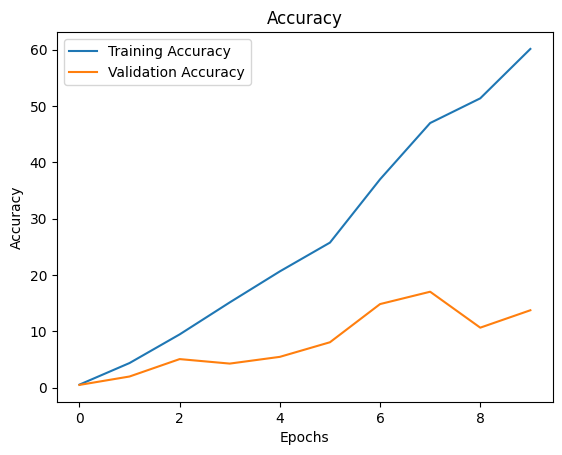

In [8]:
def plot_loss(train_loss,val_loss):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Loss')
    ax.plot(train_loss, label='Training Loss')
    ax.plot(val_loss, label='Validation Loss')
    ax.legend()

    plt.show()
    
def plot_accuracy(train_acc,val_acc):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy')
    ax.plot(train_acc, label='Training Accuracy')
    ax.plot(val_acc, label='Validation Accuracy')
    ax.legend()

    plt.show()
    
def plot_all_losses(train_loss,val_loss,val_deg_loss):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Loss')
    ax.plot(train_loss, label='Training Loss')
    ax.plot(val_loss, label='Validation Loss')
    ax.plot(val_deg_loss, label='Degraded Validation Loss')
    ax.legend()

    plt.show()
    
plot_loss(train_loss,val_deg_loss)
plot_all_losses(train_loss,val_loss,val_deg_loss)
plot_accuracy(train_acc,val_deg_acc)

In [9]:
model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
num_classes = 251
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load("Transfer_Learning/models/best_FineTuned_ResNet50_NO_FREEZE.pth"))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
from utils.augmentations import validation_augment

train_loss = []
val_loss = []
val_deg_loss = []
train_acc = []
val_acc = []
val_deg_acc = []
num_epochs = 10
best_val_loss = float('inf')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)
best_model_path = 'Transfer_Learning/models/best_FineTuned_ResNet50_NO_FREEZE_DEGRADED_DATA_ALREADY_FINETUNED.pth'
for epoch in range(num_epochs):
    print(f'Epoch: {epoch+1}')
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    i = 0
    print("Training:")
    for inputs, labels in trainL:
        i=i+1
        if i%10 == 0:
            print(f'Batch {i} di {len(trainL)}')
        labels = [int(label) for label in labels]
        
        inputs = validation_augment(inputs.cpu())
        inputs = inputs.to(device) 
        labels = torch.tensor(labels, dtype=torch.long).to(device)
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f'Training Loss: {running_loss/len(trainL)}, Accuracy: {100*correct/total}%')
    train_acc.append(100*correct/total)
    train_loss.append(running_loss/len(trainL))
    print('Validation:')
    model.eval()
    running_loss = 0.0
    i = 0
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs,labels in val:
            i+=1
            if i%10 == 0:
                print(f'Batch {i} di {len(val)}')            
            labels=[int(lable) for lable in labels]
            
            inputs,labels = inputs.to(device), torch.tensor(labels,dtype=torch.long).to(device)
            outputs = model(inputs)
            _,predicted = torch.max(outputs,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs,labels)
            running_loss += loss.item()
    val_loss_epoch = running_loss / len(val)
    print(f'Validation Loss: {val_loss_epoch}, Accuracy: {100*correct/total}%')
    val_loss.append(running_loss/len(val))
    val_acc.append(100*correct/total)
    print("Validation Degraded:")
    model.eval()
    running_loss = 0.0
    i = 0
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs,labels in valD:
            i+=1
            if i%10 == 0:
                print(f'Batch {i} di {len(valD)}')            
            labels=[int(lable) for lable in labels]
            
            inputs,labels = inputs.to(device), torch.tensor(labels,dtype=torch.long).to(device)
            outputs = model(inputs)
            _,predicted = torch.max(outputs,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            loss = criterion(outputs,labels)
            running_loss += loss.item()
    val_loss_epoch = running_loss / len(valD)
    print(f'Validation Loss: {val_loss_epoch}, Accuracy: {100*correct/total}%')
    val_deg_loss.append(running_loss/len(valD))
    val_deg_acc.append(100*correct/total)
        
    if val_loss_epoch < best_val_loss:
        best_val_loss = val_loss_epoch
        torch.save(model.state_dict(), best_model_path)
        print(f'Best model saved with degraded validation loss: {best_val_loss} and accuracy: {100*correct/total}')

Epoch: 1
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 2.9332845613826066, Accuracy: 42.504980079681275%
Validation:
Validation Loss: 5.241216778755188, Accuracy: 8.466135458167331%
Validation Degraded:
Validation Loss: 5.085813939571381, Accuracy: 7.47011952191235%
Best model saved with degraded validation loss: 5.085813939571381 and accuracy: 7.47011952191235
Epoch: 2
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 2.426597862970084, Accuracy: 49.55179282868526%
Validation:
Validation Loss: 4.638192772865295, Accuracy: 13.844621513944222%
Validation Degraded:
Validation Loss: 4.667274057865143, Accuracy: 11.852589641434262%
Best model saved with degraded validation loss: 4.667274057865143 and accuracy: 11.852589641434262
Epoch: 3
Training:
Batch 10 di 32
Batch 20 di 32
Batch 30 di 32
Training Loss: 1.833917832467705, Accuracy: 63.59561752988048%
Validation:
Validation Loss: 4.84741336107254, Accuracy: 12.848605577689243%
Validation Degrad

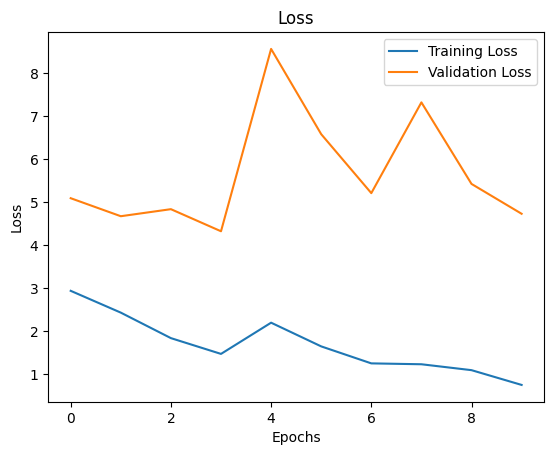

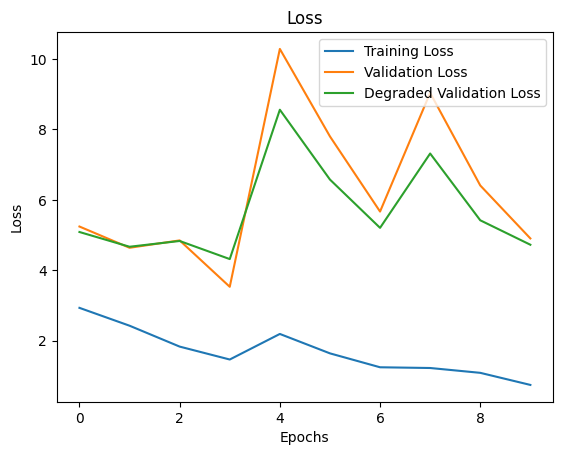

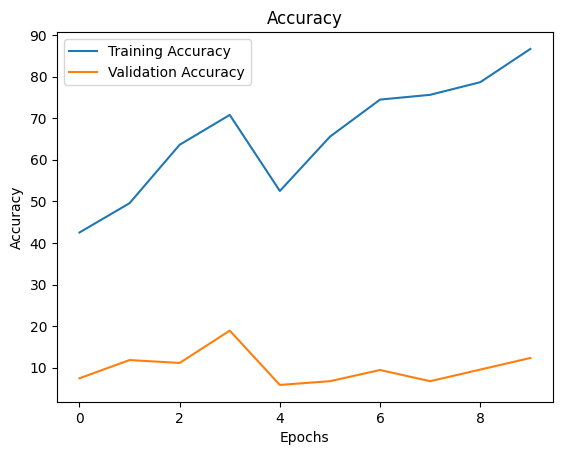

In [11]:
def plot_loss(train_loss,val_loss):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Loss')
    ax.plot(train_loss, label='Training Loss')
    ax.plot(val_loss, label='Validation Loss')
    ax.legend()

    plt.show()
    
def plot_accuracy(train_acc,val_acc):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy')
    ax.plot(train_acc, label='Training Accuracy')
    ax.plot(val_acc, label='Validation Accuracy')
    ax.legend()

    plt.show()
    
def plot_all_losses(train_loss,val_loss,val_deg_loss):
    fig, ax = plt.subplots()


    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Loss')
    ax.plot(train_loss, label='Training Loss')
    ax.plot(val_loss, label='Validation Loss')
    ax.plot(val_deg_loss, label='Degraded Validation Loss')
    ax.legend()

    plt.show()
    
plot_loss(train_loss,val_deg_loss)
plot_all_losses(train_loss,val_loss,val_deg_loss)
plot_accuracy(train_acc,val_deg_acc)